In [1]:
import numpy as np
import lpt as lpt
import CosmologyLibraryM as cosmolib
import matplotlib.pyplot as plt
import gc
import copy
import time
import numpy.ma as ma
import matplotlib.gridspec as gridspec


In [2]:
## All the parameters 
GridSize = 128
XSize = 128.

# Obtaining initial density field and the associated Power Spectrum

In [3]:
## Get a density field
inst1 = lpt.initial_density_field(GridSize=GridSize, XSize = XSize,Seed = None)
deltax =  inst1.initial_deltax()
kbyh,Pkbyh,ind = inst1.PS_initial()
del ind
gc.collect()

53

 # Calculating Power Spectrum of the initial density field (Sanity Check)

In [4]:
start = time.time()
Pk,k = inst1.PS_calc(XSize,deltax,NofBins=100,kmin=None,kmax=None)
j=0
print time.time()-start
del deltax,inst1
gc.collect()

0.271457910538


0


#### Multiple Realisations

In [5]:
Pkm = copy.deepcopy(Pk)

In [6]:
j+=1
N=100
for i in range(0,N):
    inst1 = lpt.initial_density_field(GridSize = GridSize, XSize = XSize, Seed = None)
    deltax = inst1.initial_deltax()
    Pk_temp,k_temp = inst1.PS_calc(XSize,deltax,NofBins = 100, kmin=None, kmax=None)
    Pkm+=Pk_temp
    del inst1,deltax,Pk_temp,k_temp
    gc.collect()
Pkmult = Pkm/(1+j*N)
print (1+j*N)

101


/usr/local/lib/python2.7/dist-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


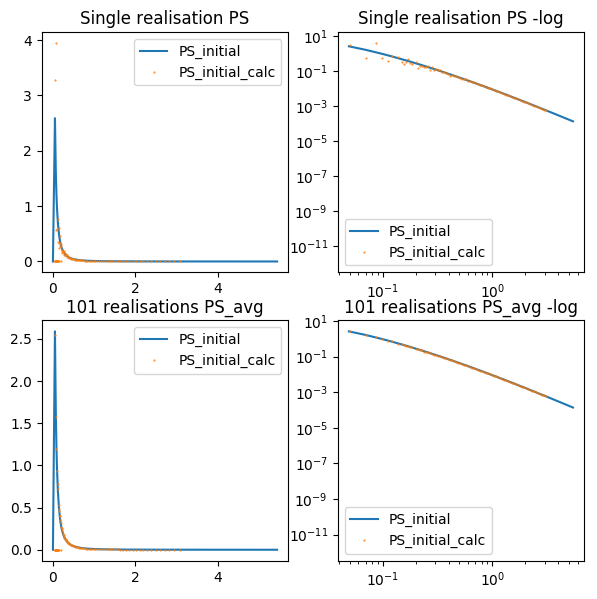

In [7]:
fig = plt.figure(figsize=(7,7), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(2,2,1)
plt.title('Single realisation PS')
plt.plot(kbyh,Pkbyh,label='PS_initial')
plt.plot(k,Pk,'.',markersize=1,label='PS_initial_calc')
plt.legend()

plt.subplot(2,2,2)
plt.title('Single realisation PS -log')
plt.loglog(kbyh,Pkbyh,label='PS_initial')
plt.loglog(k,Pk,'.',markersize=1,label='PS_initial_calc')
plt.legend()

plt.subplot(2,2,3)

plt.title(str(1+j*100)+' realisations PS_avg')
plt.plot(kbyh,Pkbyh,label='PS_initial')
plt.plot(k,Pkmult,'.',markersize=1,label='PS_initial_calc')
plt.legend()

plt.subplot(2,2,4)
plt.title(str(1+j*100)+' realisations PS_avg -log')
plt.loglog(kbyh,Pkbyh,label = 'PS_initial')
plt.loglog(k,Pkmult,'.',markersize=1,label='PS_initial_calc')
plt.legend()
plt.show()

In [8]:
del Pkmult,k,kbyh,Pkbyh,Pkm,Pk
gc.collect()

1936

## Comparing 2lpt,zeldovich,linear power spectrum at different redshifts

### Box Size 128 Mpc h^-1

In [6]:
inst2 = lpt.LPT(GridSize=GridSize, XSize = 128,Seed = None)
print '1'
RedShift =0
Pk_zeld ,k_zeld = inst2 PS_zeld_cic(RedShift)
print '2'
k = np.logspace(-3,2,100)
Tf_bbks = inst2.BBKS_tf(k)
print '3'
Pk_linear = inst2.PS(k,RedShift,Tf_bbks)
print '4'
Pk_2lpt ,k_2lpt = inst2.PS_2lpt_cic(RedShift)
print '5'
###Plotting
fig=plt.figure(figsize=(16,16))


caption = ["z = 0", "z = 10", "z = 100","linear","zeld","2lpt"]
f = lambda l: plt.plot([],[], color = 'k', linestyle = l)[0]
h = lambda c: plt.plot([],[], color = c , linestyle = '-')[0]
handles = [h("crimson"),h("purple"),h("gold"),f("-"),f("--"),f("-.")]


plt.subplot(3,2,1)
plt.title('Box = 128 Mpc h^-1')


plt.loglog(k_2lpt[np.where(Pk_2lpt>1e-6)[0]],Pk_2lpt[np.where(Pk_2lpt>1e-6)[0]],color = "crimson",linestyle ="--" ,label='2lpt')
plt.loglog(k_zeld[np.where(Pk_zeld>1e-6)[0]],Pk_zeld[np.where(Pk_zeld>1e-6)[0]],color="crimson",linestyle = "-.",label='zeld')


plt.loglog(k,Pk_linear,color = "crimson",label = 'linear PS')
plt.axvline(k_2lpt.min(),color='k', linestyle='--',linewidth=.1)
plt.axvline(k_2lpt.max(),color='k', linestyle='--',linewidth=.1)

plt.subplot(3,2,2)
plt.loglog(k_2lpt[np.where(Pk_2lpt>1e-6)[0]],Pk_2lpt[np.where(Pk_2lpt>1e-6)[0]],color="crimson",linestyle ="--" ,label='2lpt')
plt.loglog(k_zeld[np.where(Pk_zeld>1e-6)[0]],Pk_zeld[np.where(Pk_zeld>1e-6)[0]],color="crimson",linestyle = "-.",label='zeld')

plt.loglog(k,Pk_linear,color = "crimson",label = 'linear PS')
plt.axvline(k_2lpt.min(),color='k', linestyle='--',linewidth=.1)
plt.axvline(k_2lpt.max(),color='k', linestyle='--',linewidth=.1)
plt.xlim([k_2lpt.min(),k_2lpt.max()])

RedShift =10
Pk_zeld ,k_zeld = inst2.PS_zeld_cic(RedShift)
k = np.logspace(-3,2,100)
Tf_bbks = inst2.BBKS_tf(k)
Pk_linear = inst2.PS(k,RedShift,Tf_bbks)
Pk_2lpt ,k_2lpt = inst2.PS_2lpt_cic(RedShift)

###Plotting
plt.subplot(3,2,1)
plt.loglog(k_2lpt[np.where(Pk_2lpt>1e-6)[0]],Pk_2lpt[np.where(Pk_2lpt>1e-6)[0]],color = "purple",linestyle ="--" ,label='2lpt')
plt.loglog(k_zeld[np.where(Pk_zeld>1e-6)[0]],Pk_zeld[np.where(Pk_zeld>1e-6)[0]],color = "purple",linestyle = "-.",label='zeld')
plt.loglog(k,Pk_linear,color = "purple",label = 'linear PS')
plt.axvline(k_2lpt.min(),color='k', linestyle='--',linewidth=.1)
plt.axvline(k_2lpt.max(),color='k', linestyle='--',linewidth=.1)
print k_2lpt.min(),k_zeld.min()

plt.subplot(3,2,2)
plt.loglog(k_2lpt[np.where(Pk_2lpt>1e-6)[0]],Pk_2lpt[np.where(Pk_2lpt>1e-6)[0]],color = "purple",linestyle ="--" ,label='2lpt')
plt.loglog(k_zeld[np.where(Pk_zeld>1e-6)[0]],Pk_zeld[np.where(Pk_zeld>1e-6)[0]],color = "purple",linestyle = "-.",label='zeld')
plt.loglog(k,Pk_linear,color = "purple",label = 'linear PS')
plt.axvline(k_2lpt.min(),color='k', linestyle='--',linewidth=.1)
plt.axvline(k_2lpt.max(),color='k', linestyle='--',linewidth=.1)
plt.xlim([k_2lpt.min(),k_2lpt.max()])


RedShift =100
Pk_zeld ,k_zeld = inst2.PS_zeld_cic(RedShift)
k = np.logspace(-3,2,100)
Tf_bbks = inst2.BBKS_tf(k)
Pk_linear = inst2.PS(k,RedShift,Tf_bbks)
Pk_2lpt ,k_2lpt = inst2.PS_2lpt_cic(RedShift)

###Plotting
plt.subplot(3,2,1)
plt.loglog(k_2lpt[np.where(Pk_2lpt>1e-6)[0]],Pk_2lpt[np.where(Pk_2lpt>1e-6)[0]],color = "gold",linestyle ="--" ,label='2lpt')
plt.loglog(k_zeld[np.where(Pk_zeld>1e-6)[0]],Pk_zeld[np.where(Pk_zeld>1e-6)[0]],color = "gold",linestyle = "-.",label='zeld')
plt.loglog(k,Pk_linear,color = "gold",label = 'linear PS')
plt.axvline(k_2lpt.min(),color='k', linestyle='--',linewidth=.1)
plt.axvline(k_2lpt.max(),color='k', linestyle='--',linewidth=.1)
plt.legend(handles,caption)

plt.subplot(3,2,2)
plt.loglog(k_2lpt[np.where(Pk_2lpt>1e-6)[0]],Pk_2lpt[np.where(Pk_2lpt>1e-6)[0]],color = "gold",linestyle ="--" ,label='2lpt')
plt.loglog(k_zeld[np.where(Pk_zeld>1e-6)[0]],Pk_zeld[np.where(Pk_zeld>1e-6)[0]],color = "gold",linestyle = "-.",label='zeld')
plt.loglog(k,Pk_linear,color = "gold",label = 'linear PS')
plt.axvline(k_2lpt.min(),color='k', linestyle='--',linewidth=.1)
plt.axvline(k_2lpt.max(),color='k', linestyle='--',linewidth=.1)
plt.xlim([k_2lpt.min(),k_2lpt.max()])
plt.legend(handles,caption)

1
2
3
4
5


/usr/local/lib/python2.7/dist-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


0.0501293438133 0.0501293438133


### Box Size = 1024 h Mpc^-1

In [7]:

inst2 = lpt.LPT(GridSize=GridSize, XSize = 1024,Seed = None)
RedShift =0
Pk_zeld ,k_zeld = inst2.PS_zeld_cic(RedShift)
k = np.logspace(-3,2,100)
Tf_bbks = inst2.BBKS_tf(k)
Pk_linear = inst2.PS(k,RedShift,Tf_bbks)
Pk_2lpt ,k_2lpt = inst2.PS_2lpt_cic(RedShift)

###Plotting
plt.subplot(3,2,3)
plt.title('Box = 1024 Mpc h^-1')

plt.loglog(k_2lpt[np.where(Pk_2lpt>1e-6)[0]],Pk_2lpt[np.where(Pk_2lpt>1e-6)[0]],color = "crimson",linestyle ="--" ,label='2lpt')
plt.loglog(k_zeld[np.where(Pk_zeld>1e-6)[0]],Pk_zeld[np.where(Pk_zeld>1e-6)[0]],color = "crimson",linestyle = "-.",label='zeld')


plt.loglog(k,Pk_linear,color = "crimson",label = 'linear PS')
plt.axvline(k_2lpt.min(),color='k', linestyle='--',linewidth=.1)
plt.axvline(k_2lpt.max(),color='k', linestyle='--',linewidth=.1)
print k_2lpt.min(),k_zeld.min()

plt.subplot(3,2,4)
plt.loglog(k_2lpt[np.where(Pk_2lpt>1e-6)[0]],Pk_2lpt[np.where(Pk_2lpt>1e-6)[0]],color = "crimson",linestyle ="--" ,label='2lpt')
plt.loglog(k_zeld[np.where(Pk_zeld>1e-6)[0]],Pk_zeld[np.where(Pk_zeld>1e-6)[0]],color = "crimson",linestyle = "-.",label='zeld')
plt.loglog(k,Pk_linear,color = "crimson",label = 'linear PS')
plt.axvline(k_2lpt.min(),color='k', linestyle='--',linewidth=.1)
plt.axvline(k_2lpt.max(),color='k', linestyle='--',linewidth=.1)
plt.xlim([k_2lpt.min(),k_2lpt.max()])

RedShift =10
Pk_zeld ,k_zeld = inst2.PS_zeld_cic(RedShift)
k = np.logspace(-3,2,100)
Tf_bbks = inst2.BBKS_tf(k)
Pk_linear = inst2.PS(k,RedShift,Tf_bbks)
Pk_2lpt ,k_2lpt = inst2.PS_2lpt_cic(RedShift)

###Plotting
plt.subplot(3,2,3)
plt.loglog(k_2lpt[np.where(Pk_2lpt>1e-6)[0]],Pk_2lpt[np.where(Pk_2lpt>1e-6)[0]],color = "purple",linestyle ="--" ,label='2lpt')
plt.loglog(k_zeld[np.where(Pk_zeld>1e-6)[0]],Pk_zeld[np.where(Pk_zeld>1e-6)[0]],color = "purple",linestyle = "-.",label='zeld')
plt.loglog(k,Pk_linear,color = "purple",label = 'linear PS')
plt.axvline(k_2lpt.min(),color='k', linestyle='--',linewidth=.1)
plt.axvline(k_2lpt.max(),color='k', linestyle='--',linewidth=.1)
print k_2lpt.min(),k_zeld.min()

plt.subplot(3,2,4)
plt.loglog(k_2lpt[np.where(Pk_2lpt>1e-6)[0]],Pk_2lpt[np.where(Pk_2lpt>1e-6)[0]],color = "purple",linestyle ="--" ,label='2lpt')
plt.loglog(k_zeld[np.where(Pk_zeld>1e-6)[0]],Pk_zeld[np.where(Pk_zeld>1e-6)[0]],color = "purple",linestyle = "-.",label='zeld')
plt.loglog(k,Pk_linear,color = "purple",label = 'linear PS')
plt.axvline(k_2lpt.min(),color='k', linestyle='--',linewidth=.1)
plt.axvline(k_2lpt.max(),color='k', linestyle='--',linewidth=.1)
plt.xlim([k_2lpt.min(),k_2lpt.max()])


RedShift =100
Pk_zeld ,k_zeld = inst2.PS_zeld_cic(RedShift)
k = np.logspace(-3,2,100)
Tf_bbks = inst2.BBKS_tf(k)
Pk_linear = inst2.PS(k,RedShift,Tf_bbks)
Pk_2lpt ,k_2lpt = inst2.PS_2lpt_cic(RedShift)

###Plotting
plt.subplot(3,2,3)
plt.loglog(k_2lpt[np.where(Pk_2lpt>1e-6)[0]],Pk_2lpt[np.where(Pk_2lpt>1e-6)[0]],color = "gold",linestyle ="--" ,label='2lpt')
plt.loglog(k_zeld[np.where(Pk_zeld>1e-6)[0]],Pk_zeld[np.where(Pk_zeld>1e-6)[0]],color = "gold",linestyle = "-.",label='zeld')
plt.loglog(k,Pk_linear,color = "gold",label = 'linear PS')
plt.axvline(k_2lpt.min(),color='k', linestyle='--',linewidth=.1)
plt.axvline(k_2lpt.max(),color='k', linestyle='--',linewidth=.1)
plt.legend(handles,caption)

plt.subplot(3,2,4)
plt.loglog(k_2lpt[np.where(Pk_2lpt>1e-6)[0]],Pk_2lpt[np.where(Pk_2lpt>1e-6)[0]],color = "gold",linestyle ="--" ,label='2lpt')
plt.loglog(k_zeld[np.where(Pk_zeld>1e-6)[0]],Pk_zeld[np.where(Pk_zeld>1e-6)[0]],color = "gold",linestyle = "-.",label='zeld')
plt.loglog(k,Pk_linear,color = "gold",label = 'linear PS')
plt.axvline(k_2lpt.min(),color='k', linestyle='--',linewidth=.1)
plt.axvline(k_2lpt.max(),color='k', linestyle='--',linewidth=.1)
plt.xlim([k_2lpt.min(),k_2lpt.max()])
plt.legend(handles,caption)

0.00626616797666 0.00626616797666
0.00626616797666 0.00626616797666


### BoxSize = 4096 Mpc h ^-1

0.00156654199417 0.00156654199417


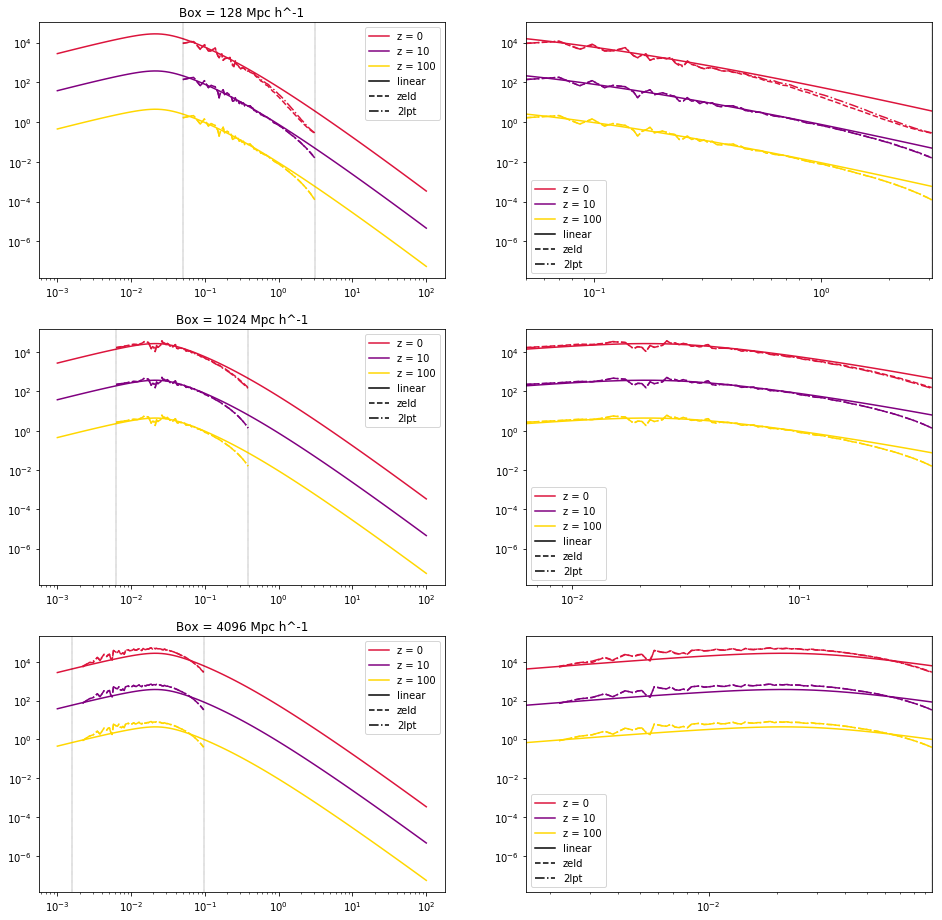

In [8]:
inst2 = lpt.LPT(GridSize=GridSize, XSize = 4096,Seed = None)
RedShift =0
Pk_zeld ,k_zeld = inst2.PS_zeld_cic(RedShift)
k = np.logspace(-3,2,100)
Tf_bbks = inst2.BBKS_tf(k)
Pk_linear = inst2.PS(k,RedShift,Tf_bbks)
Pk_2lpt ,k_2lpt = inst2.PS_2lpt_cic(RedShift)

###Plotting
plt.subplot(3,2,5)
plt.title('Box = 4096 Mpc h^-1')

plt.loglog(k_2lpt[np.where(Pk_2lpt>1e-6)[0]],Pk_2lpt[np.where(Pk_2lpt>1e-6)[0]],color = "crimson",linestyle ="--" ,label='2lpt')
plt.loglog(k_zeld[np.where(Pk_zeld>1e-6)[0]],Pk_zeld[np.where(Pk_zeld>1e-6)[0]],color = "crimson",linestyle = "-.",label='zeld')

plt.loglog(k,Pk_linear,color = "crimson",label = 'linear PS')
plt.axvline(k_2lpt.min(),color='k', linestyle='--',linewidth=.1)
plt.axvline(k_2lpt.max(),color='k', linestyle='--',linewidth=.1)

plt.subplot(3,2,6)
plt.loglog(k_2lpt[np.where(Pk_2lpt>1e-6)[0]],Pk_2lpt[np.where(Pk_2lpt>1e-6)[0]],color = "crimson",linestyle ="--" ,label='2lpt')
plt.loglog(k_zeld[np.where(Pk_zeld>1e-6)[0]],Pk_zeld[np.where(Pk_zeld>1e-6)[0]],color = "crimson",linestyle = "-.",label='zeld')
plt.loglog(k,Pk_linear,color = "crimson",label = 'linear PS')
plt.axvline(k_2lpt.min(),color='k', linestyle='--',linewidth=.1)
plt.axvline(k_2lpt.max(),color='k', linestyle='--',linewidth=.1)
plt.xlim([k_2lpt.min(),k_2lpt.max()])

RedShift =10
Pk_zeld ,k_zeld = inst2.PS_zeld_cic(RedShift)
k = np.logspace(-3,2,100)
Tf_bbks = inst2.BBKS_tf(k)
Pk_linear = inst2.PS(k,RedShift,Tf_bbks)
Pk_2lpt ,k_2lpt = inst2.PS_2lpt_cic(RedShift)

###Plotting
plt.subplot(3,2,5)
plt.loglog(k_2lpt[np.where(Pk_2lpt>1e-6)[0]],Pk_2lpt[np.where(Pk_2lpt>1e-6)[0]],color = "purple",linestyle ="--" ,label='2lpt')
plt.loglog(k_zeld[np.where(Pk_zeld>1e-6)[0]],Pk_zeld[np.where(Pk_zeld>1e-6)[0]],color = "purple",linestyle = "-.",label='zeld')
plt.loglog(k,Pk_linear,color = "purple",label = 'linear PS')
plt.axvline(k_2lpt.min(),color='k', linestyle='--',linewidth=.1)
plt.axvline(k_2lpt.max(),color='k', linestyle='--',linewidth=.1)
print k_2lpt.min(),k_zeld.min()

plt.subplot(3,2,6)
plt.loglog(k_2lpt[np.where(Pk_2lpt>1e-6)[0]],Pk_2lpt[np.where(Pk_2lpt>1e-6)[0]],color = "purple",linestyle ="--" ,label='2lpt')
plt.loglog(k_zeld[np.where(Pk_zeld>1e-6)[0]],Pk_zeld[np.where(Pk_zeld>1e-6)[0]],color = "purple",linestyle = "-.",label='zeld')
plt.loglog(k,Pk_linear,color = "purple",label = 'linear PS')
plt.axvline(k_2lpt.min(),color='k', linestyle='--',linewidth=.1)
plt.axvline(k_2lpt.max(),color='k', linestyle='--',linewidth=.1)
plt.xlim([k_2lpt.min(),k_2lpt.max()])


RedShift =100
Pk_zeld ,k_zeld = inst2.PS_zeld_cic(RedShift)
k = np.logspace(-3,2,100)
Tf_bbks = inst2.BBKS_tf(k)
Pk_linear = inst2.PS(k,RedShift,Tf_bbks)
Pk_2lpt ,k_2lpt = inst2.PS_2lpt_cic(RedShift)

###Plotting
plt.subplot(3,2,5)
plt.loglog(k_2lpt[np.where(Pk_2lpt>1e-6)[0]],Pk_2lpt[np.where(Pk_2lpt>1e-6)[0]],color = "gold",linestyle ="--" ,label='2lpt')
plt.loglog(k_zeld[np.where(Pk_zeld>1e-6)[0]],Pk_zeld[np.where(Pk_zeld>1e-6)[0]],color = "gold",linestyle = "-.",label='zeld')
plt.loglog(k,Pk_linear,color = "gold",label = 'linear PS')
plt.axvline(k_2lpt.min(),color='k', linestyle='--',linewidth=.1)
plt.axvline(k_2lpt.max(),color='k', linestyle='--',linewidth=.1)
plt.legend(handles,caption)

plt.subplot(3,2,6)
plt.loglog(k_2lpt[np.where(Pk_2lpt>1e-6)[0]],Pk_2lpt[np.where(Pk_2lpt>1e-6)[0]],color = "gold",linestyle ="--" ,label='2lpt')
plt.loglog(k_zeld[np.where(Pk_zeld>1e-6)[0]],Pk_zeld[np.where(Pk_zeld>1e-6)[0]],color = "gold",linestyle = "-.",label='zeld')
plt.loglog(k,Pk_linear,color = "gold",label = 'linear PS')
plt.axvline(k_2lpt.min(),color='k', linestyle='--',linewidth=.1)
plt.axvline(k_2lpt.max(),color='k', linestyle='--',linewidth=.1)
plt.xlim([k_2lpt.min(),k_2lpt.max()])
plt.legend(handles,caption)
plt.show()

## Box 40 Mpc h^-1

0.160413900203 0.160413900203
0.160413900203 0.160413900203
0.160413900203 0.160413900203


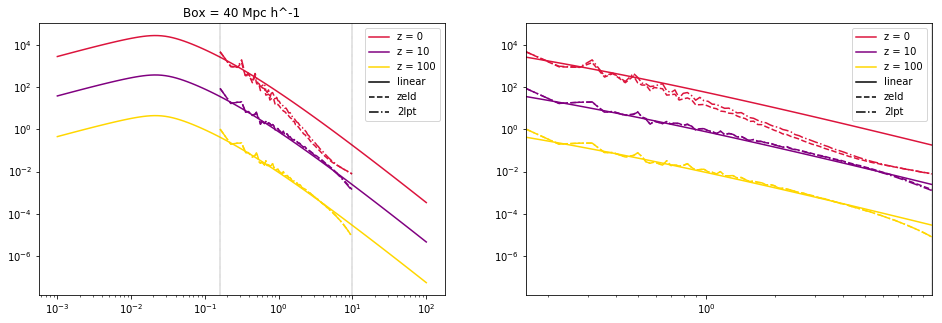

In [9]:
fig=plt.figure(figsize=(16,5))
inst2 = lpt.LPT(GridSize=GridSize, XSize = 40,Seed = None)
RedShift =0
Pk_zeld ,k_zeld = inst2.PS_zeld_cic(RedShift)
k = np.logspace(-3,2,100)
Tf_bbks = inst2.BBKS_tf(k)
Pk_linear = inst2.PS(k,RedShift,Tf_bbks)
Pk_2lpt ,k_2lpt = inst2.PS_2lpt_cic(RedShift)

###Plotting
plt.subplot(1,2,1)
plt.title('Box = 40 Mpc h^-1')

plt.loglog(k_2lpt[np.where(Pk_2lpt>1e-6)[0]],Pk_2lpt[np.where(Pk_2lpt>1e-6)[0]],color = "crimson",linestyle ="--" ,label='2lpt')
plt.loglog(k_zeld[np.where(Pk_zeld>1e-6)[0]],Pk_zeld[np.where(Pk_zeld>1e-6)[0]],color = "crimson",linestyle = "-.",label='zeld')


plt.loglog(k,Pk_linear,color = "crimson",label = 'linear PS')
plt.axvline(k_2lpt.min(),color='k', linestyle='--',linewidth=.1)
plt.axvline(k_2lpt.max(),color='k', linestyle='--',linewidth=.1)
print k_2lpt.min(),k_zeld.min()
plt.legend()

plt.subplot(1,2,2)
plt.loglog(k_2lpt[np.where(Pk_2lpt>1e-6)[0]],Pk_2lpt[np.where(Pk_2lpt>1e-6)[0]],color = "crimson",linestyle ="--" ,label='2lpt')
plt.loglog(k_zeld[np.where(Pk_zeld>1e-6)[0]],Pk_zeld[np.where(Pk_zeld>1e-6)[0]],color = "crimson",linestyle = "-.",label='zeld')
plt.loglog(k,Pk_linear,color = "crimson",label = 'linear PS')
plt.axvline(k_2lpt.min(),color='k', linestyle='--',linewidth=.1)
plt.axvline(k_2lpt.max(),color='k', linestyle='--',linewidth=.1)
plt.legend()
plt.xlim([k_2lpt.min(),k_2lpt.max()])

RedShift =10
Pk_zeld ,k_zeld = inst2.PS_zeld_cic(RedShift)
k = np.logspace(-3,2,100)
Tf_bbks = inst2.BBKS_tf(k)
Pk_linear = inst2.PS(k,RedShift,Tf_bbks)
Pk_2lpt ,k_2lpt = inst2.PS_2lpt_cic(RedShift)

###Plotting
plt.subplot(1,2,1)
plt.loglog(k_2lpt[np.where(Pk_2lpt>1e-6)[0]],Pk_2lpt[np.where(Pk_2lpt>1e-6)[0]],color = "purple",linestyle ="--" ,label='2lpt')
plt.loglog(k_zeld[np.where(Pk_zeld>1e-6)[0]],Pk_zeld[np.where(Pk_zeld>1e-6)[0]],color = "purple",linestyle = "-.",label='zeld')
plt.loglog(k,Pk_linear,color = "purple",label = 'linear PS')
plt.axvline(k_2lpt.min(),color='k', linestyle='--',linewidth=.1)
plt.axvline(k_2lpt.max(),color='k', linestyle='--',linewidth=.1)
print k_2lpt.min(),k_zeld.min()

plt.subplot(1,2,2)
plt.loglog(k_2lpt[np.where(Pk_2lpt>1e-6)[0]],Pk_2lpt[np.where(Pk_2lpt>1e-6)[0]],color = "purple",linestyle ="--" ,label='2lpt')
plt.loglog(k_zeld[np.where(Pk_zeld>1e-6)[0]],Pk_zeld[np.where(Pk_zeld>1e-6)[0]],color = "purple",linestyle = "-.",label='zeld')
plt.loglog(k,Pk_linear,color = "purple",label = 'linear PS')
plt.axvline(k_2lpt.min(),color='k', linestyle='--',linewidth=.1)
plt.axvline(k_2lpt.max(),color='k', linestyle='--',linewidth=.1)
plt.legend()
plt.xlim([k_2lpt.min(),k_2lpt.max()])


RedShift =100
Pk_zeld1 ,k_zeld = inst2.PS_zeld_cic(RedShift)
k = np.logspace(-3,2,100)
Tf_bbks = inst2.BBKS_tf(k)
Pk_linear = inst2.PS(k,RedShift,Tf_bbks)
Pk_2lpt1 ,k_2lpt = inst2.PS_2lpt_cic(RedShift)

###Plotting
plt.subplot(1,2,1)
plt.loglog(k_2lpt[np.where(Pk_2lpt1>1e-6)[0]],Pk_2lpt1[np.where(Pk_2lpt1>1e-6)[0]],color = "gold",linestyle ="--" ,label='2lpt')
plt.loglog(k_zeld[np.where(Pk_zeld1>1e-6)[0]],Pk_zeld1[np.where(Pk_zeld1>1e-6)[0]],color = "gold",linestyle = "-.",label='zeld')
plt.loglog(k,Pk_linear,color = "gold",label = 'linear PS')
plt.axvline(k_2lpt.min(),color='k', linestyle='--',linewidth=.1)
plt.axvline(k_2lpt.max(),color='k', linestyle='--',linewidth=.1)
print k_2lpt.min(),k_zeld.min()
plt.legend(handles,caption)

plt.subplot(1,2,2)
plt.loglog(k_2lpt[np.where(Pk_2lpt1>1e-6)[0]],Pk_2lpt1[np.where(Pk_2lpt1>1e-6)[0]],color = "gold",linestyle ="--" ,label='2lpt')
plt.loglog(k_zeld[np.where(Pk_zeld1>1e-6)[0]],Pk_zeld1[np.where(Pk_zeld1>1e-6)[0]],color = "gold",linestyle = "-.",label='zeld')
plt.loglog(k,Pk_linear,color = "gold",label = 'linear PS')
plt.axvline(k_2lpt.min(),color='k', linestyle='--',linewidth=.1)
plt.axvline(k_2lpt.max(),color='k', linestyle='--',linewidth=.1)
plt.legend(handles,caption)
plt.xlim([k_2lpt.min(),k_2lpt.max()])
plt.show()

## Ratio of the power spectrum at different redshifts(100 and 10)  Box 40 h^-1 Mpc  to see noise cancellation

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in divide
  """Entry point for launching an IPython kernel.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in divide
  


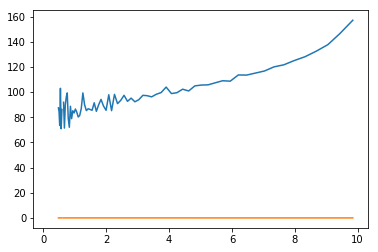

In [10]:
Ratio_zeld_100_by_10 =Pk_zeld/ Pk_zeld1
Ratio_2lpt_100_by_10 = Pk_2lpt1/Pk_2lpt
plt.plot(k_zeld,Ratio_zeld_100_by_10)
plt.plot(k_2lpt,Ratio_2lpt_100_by_10)
plt.show()

#### Overplotting all the different resolutions to get full power spectrum

In [7]:
print GridSize


128


In [8]:
## defining redshift and linear power spectrum
RedShift =10

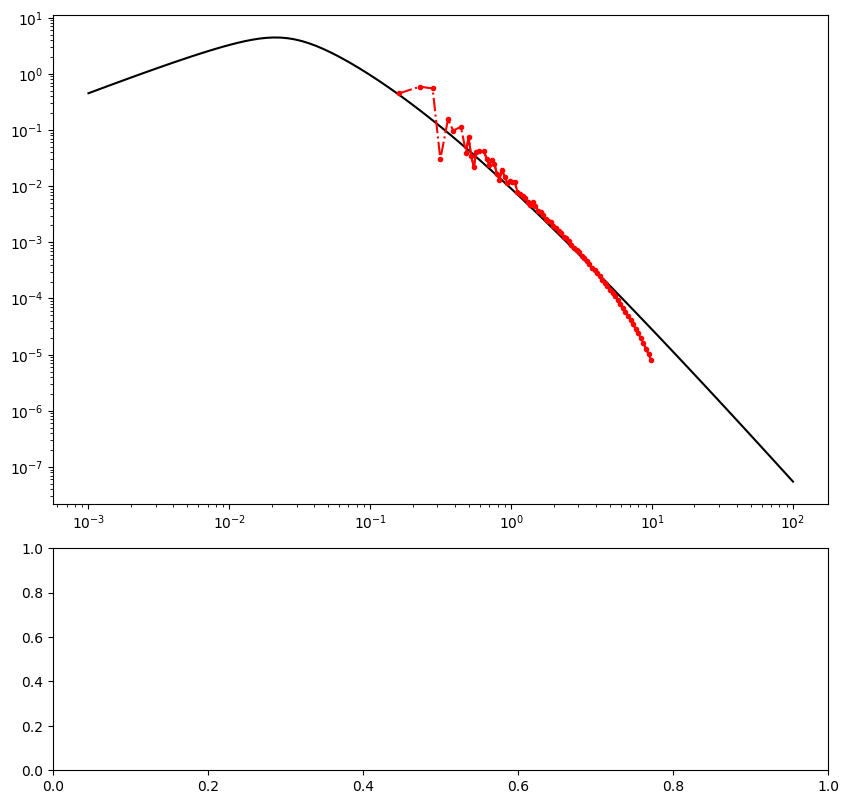

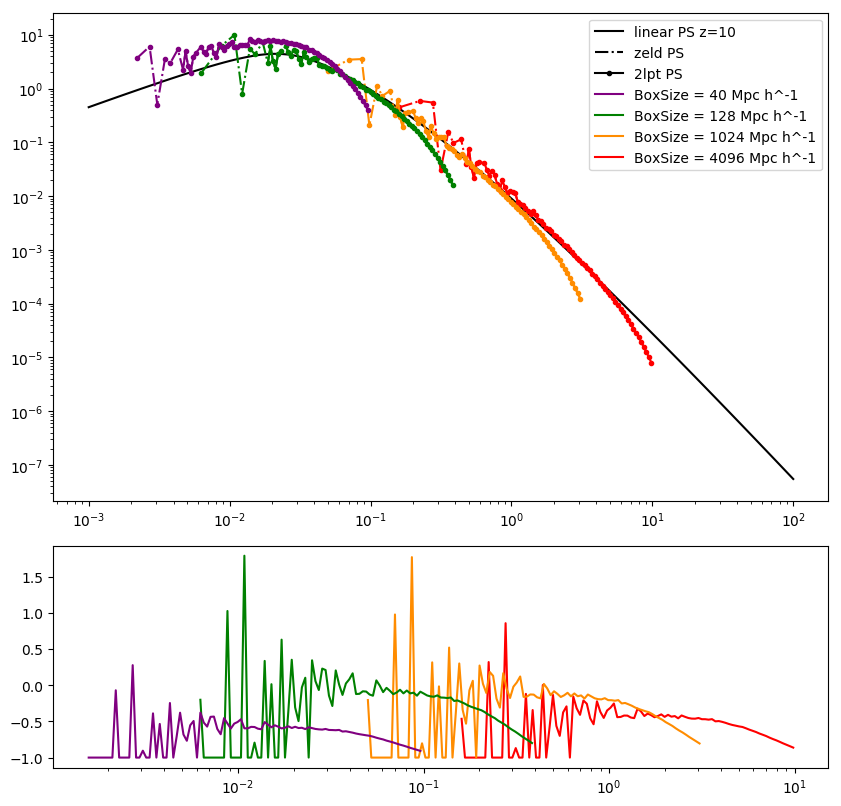

In [23]:
fig=plt.figure(figsize=(10,10), dpi= 100, facecolor='w', edgecolor='k')
gs = gridspec.GridSpec(3, 1)
ax1 = plt.subplot(gs[:-1,:])
inst2 = lpt.LPT(GridSize=GridSize, XSize = 40,Seed = 30000)
Pk_zeld ,k_zeld = inst2.PS_zeld_cic(RedShift)
Pk_2lpt ,k_2lpt = inst2.PS_2lpt_cic(RedShift)
k = np.logspace(-3,2,100)
Tf_bbks = inst2.BBKS_tf(k)
Pk_linear = inst2.PS(k,RedShift,Tf_bbks)


##plotting
ax1.loglog(k,Pk_linear,color = "k",label = 'linear PS')
ax1.loglog(k_zeld[np.where(Pk_zeld>1e-6)[0]],Pk_zeld[np.where(Pk_zeld>1e-6)[0]],color = "red",linestyle = '-.')
ax1.loglog(k_2lpt,Pk_2lpt,color = "red",marker = '.')

ax2 = plt.subplot(gs[2, :])
Tf_bbks = inst2.BBKS_tf(k_zeld)
Pk_linear = inst2.PS(k_zeld,RedShift,Tf_bbks)
Ratio = (Pk_zeld/Pk_linear-1)
ax2.semilogx(k_zeld,Ratio,color='red')

inst2 = lpt.LPT(GridSize=GridSize, XSize = 128,Seed = 30000)
Pk_zeld ,k_zeld = inst2.PS_zeld_cic(RedShift)
Pk_2lpt ,k_2lpt = inst2.PS_2lpt_cic(RedShift)
ax1.loglog(k_zeld[np.where(Pk_zeld>1e-6)[0]],Pk_zeld[np.where(Pk_zeld>1e-6)[0]],color = "darkorange",linestyle = '-.')
ax1.loglog(k_2lpt,Pk_2lpt,color = "darkorange",marker = '.')

Tf_bbks = inst2.BBKS_tf(k_zeld)
Pk_linear = inst2.PS(k_zeld,RedShift,Tf_bbks)
Ratio = (Pk_zeld/Pk_linear-1)
ax2.semilogx(k_zeld,Ratio,color='darkorange')



inst2 = lpt.LPT(GridSize=GridSize, XSize = 1024,Seed = 30000)
Pk_zeld ,k_zeld = inst2.PS_zeld_cic(RedShift)
Pk_2lpt ,k_2lpt = inst2.PS_2lpt_cic(RedShift)
ax1.loglog(k_zeld[np.where(Pk_zeld>1e-6)[0]],Pk_zeld[np.where(Pk_zeld>1e-6)[0]],color = "g",linestyle = '-.')
ax1.loglog(k_2lpt,Pk_2lpt,color = "g",marker = '.')

Tf_bbks = inst2.BBKS_tf(k_zeld)
Pk_linear = inst2.PS(k_zeld,RedShift,Tf_bbks)
Ratio = (Pk_zeld/Pk_linear-1)
ax2.semilogx(k_zeld,Ratio,color='g')


inst2 = lpt.LPT(GridSize=GridSize, XSize = 4096,Seed = 30000)
Pk_zeld ,k_zeld = inst2.PS_zeld_cic(RedShift)
Pk_2lpt ,k_2lpt = inst2.PS_2lpt_cic(RedShift)
ax1.loglog(k_zeld[np.where(Pk_zeld>1e-6)[0]],Pk_zeld[np.where(Pk_zeld>1e-6)[0]],color = "purple",linestyle = '-.')
ax1.loglog(k_2lpt,Pk_2lpt,color = "purple",marker = '.')

Tf_bbks = inst2.BBKS_tf(k_zeld)
Pk_linear = inst2.PS(k_zeld,RedShift,Tf_bbks)
Ratio = (Pk_zeld/Pk_linear-1)
ax2.semilogx(k_zeld,Ratio,color='purple')



caption = ["linear PS z=10", "zeld PS","2lpt PS","BoxSize = 40 Mpc h^-1","BoxSize = 128 Mpc h^-1", "BoxSize = 1024 Mpc h^-1","BoxSize = 4096 Mpc h^-1"]
f = lambda l,c,m: plt.plot([],[], color = c, linestyle = l,marker = m)[0]
handles = [f("-","k",None),f("-.","k",None),f(None,"k","."),f("-","purple",None),f("-","g",None),f("-","darkorange",None),f("-","red",None)]
ax1.legend(handles,caption)


plt.show()